### 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Data Preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Fraud Detection/insurance_claims.csv')

#### 2.1 understanding the data  

View some rows from the dataset to understand what the data looks like and understand the features

In [ ]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Check dataset dimensions (rows, columns).

In [ ]:
data_shape=data.shape
data_shape

(1000, 40)

In [ ]:
missing_data = data.isnull().sum()
missing_data

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


There is one row with a null entry, and another row with 91 null values. Since 91 missing values is a significant amount, the null values will be replaced with the mode.

data.describe() to generate statistics summary  for numerical columns in the DataFrame for more understanding

In [ ]:
data_dis=data.describe()
data_dis

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Overview of column data types and non-null counts.

In [ ]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### 2.2 Data Cleaning

Replace missing values in authorities_contacted with the mode and then Verify that missing values are handled.

In [ ]:

mode_value = data["authorities_contacted"].mode()[0]
data["authorities_contacted"].fillna(mode_value, inplace=True)


missing_data_replaced = data.isnull().sum()
missing_data_replaced

<ipython-input-51-c4fdd51215ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["authorities_contacted"].fillna(mode_value, inplace=True)


,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


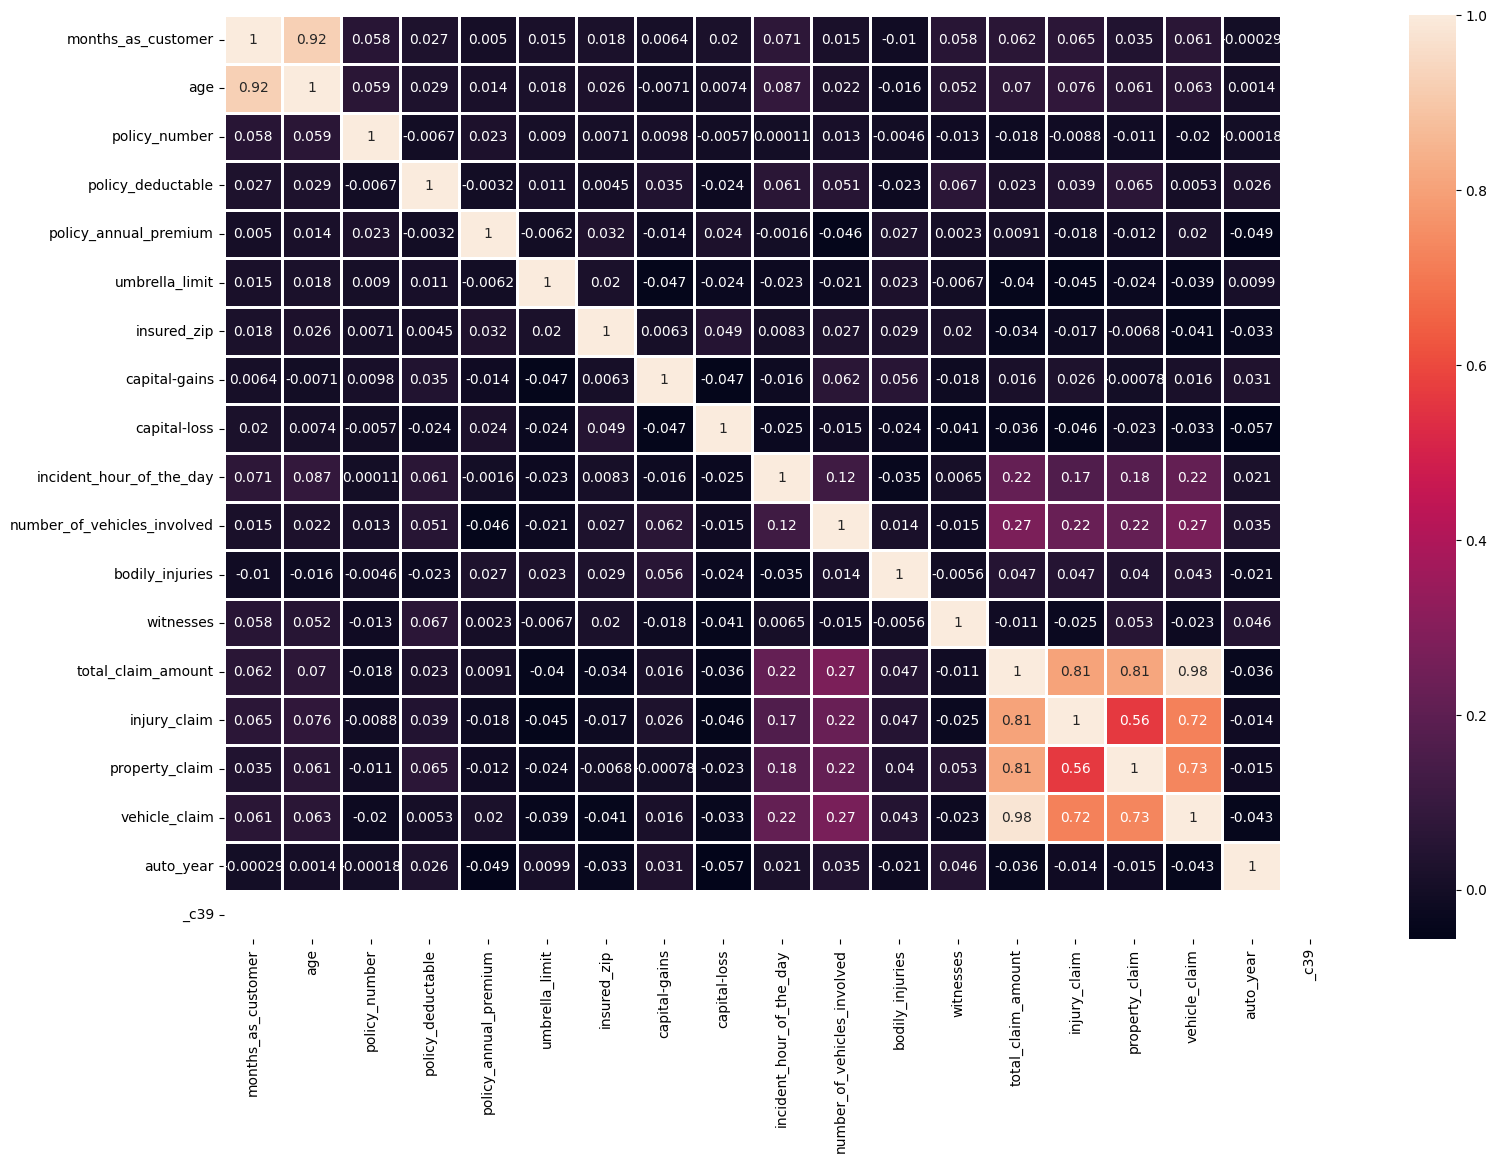

In [ ]:
numeric_data = data.select_dtypes(include=['number', 'float64', 'int64'])

corr = numeric_data.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.show()


In [ ]:
data.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


Explore relationships between numeric variables using a correlation matrix to remove unnecessary data. If two or more features are highly correlated, they provide redundant information. From the plot above, we can see a high correlation between Age and Months_as_Customer, so we will drop the Age column. Also, Total_Claim_Amount is highly correlated with Injury_Claim, Property_Claim, and Vehicle_Claim, since it is their sum. Therefore, we will drop the Total_Claim_Amount column.


In [ ]:

columns_to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39','age','total_claim_amount']

data.drop(columns_to_drop, inplace = True, axis = 1)
data.shape
data.head()


,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


### 3. Splitting Features and Labels

In [ ]:
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

### 4.Encoding Categorical Variables

Convert categorical variables into numerical format using one-hot encoding.

In [ ]:
categorical_data=X.select_dtypes(include=['object'])
for col in categorical_data.columns:
    print(f"{col}: \n{categorical_data[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' '?' 'NO']

police_report_available: 
['YES' '?' 'NO']



In [ ]:
categorical_data = pd.get_dummies(categorical_data, drop_first = True)
categorical_data.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,True,False


Combine processed numeric and encoded categorical features into a single dataset.

In [ ]:
num_data = X.select_dtypes(include = ['int64'])
X = pd.concat([num_data,categorical_data], axis = 1)

Visualize distribution of numeric features to understand skewness or outliers

<ipython-input-59-6ebae6b98a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
<ipython-input-59-6ebae6b98a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
<ipython-input-59-6ebae6b98a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v

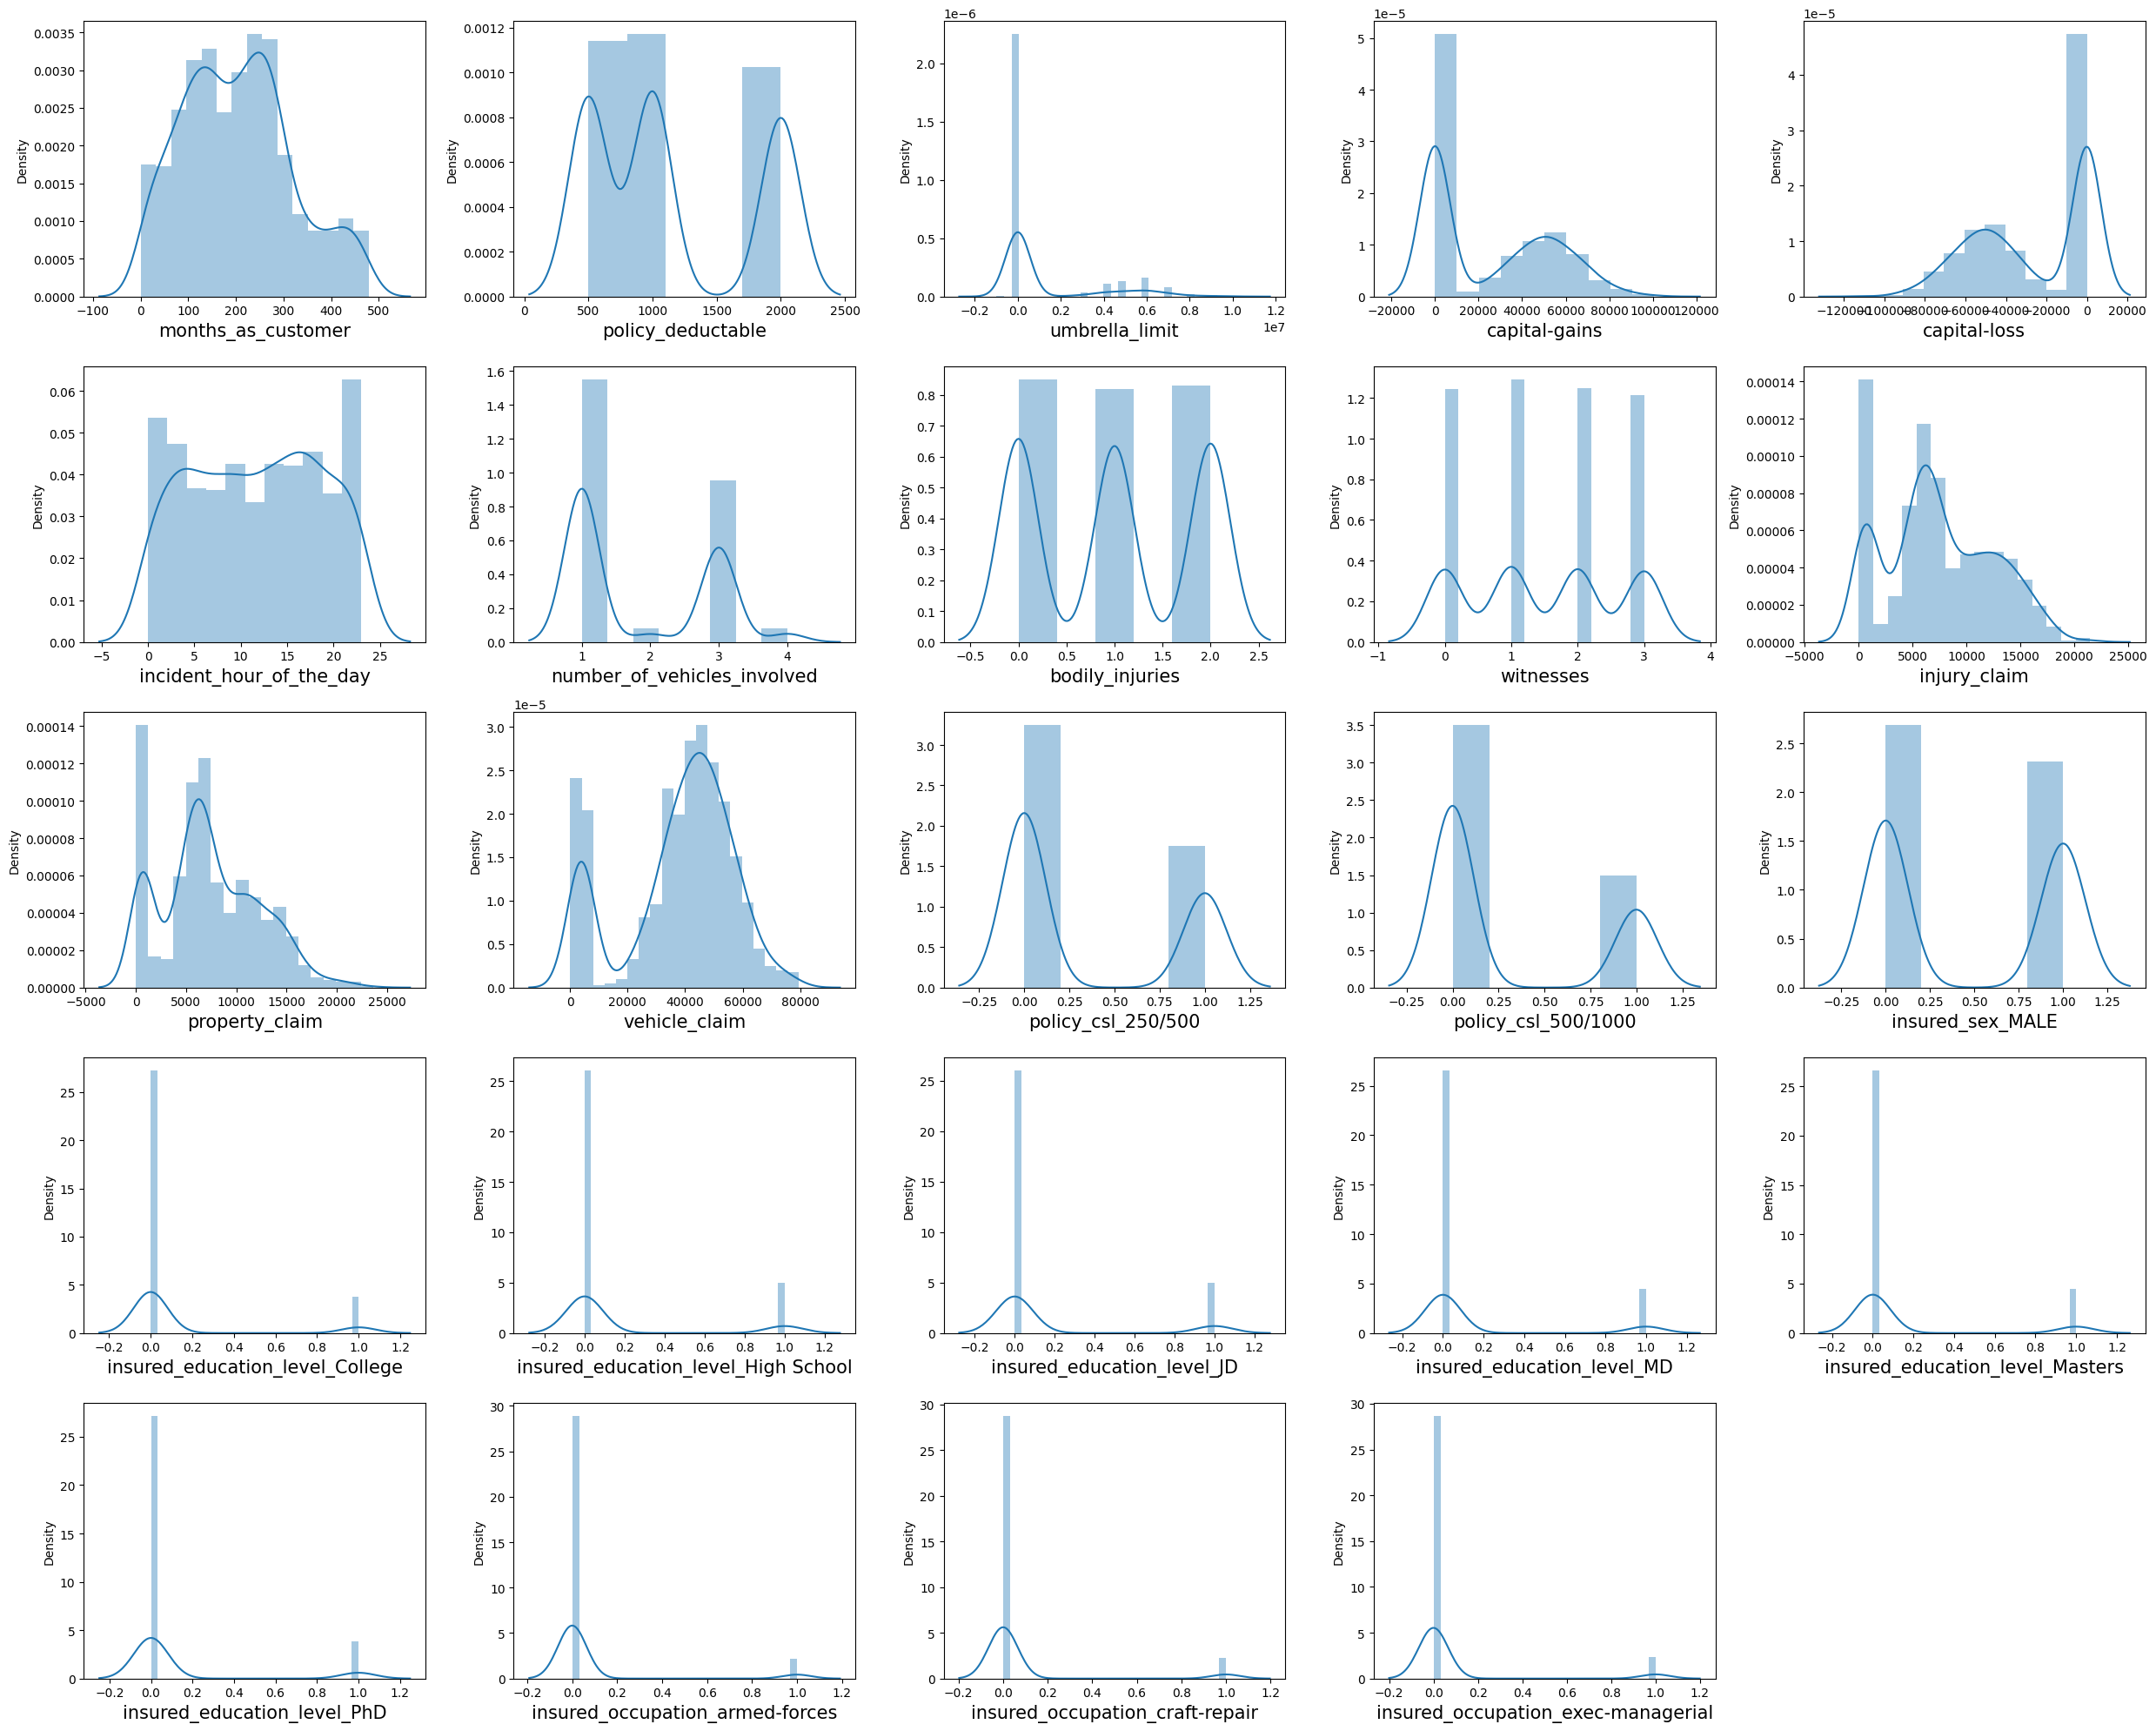

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

### 5. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
num_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
462,448,2000,0,38600,-50300,10,3,2,1,5970,...,False,False,False,False,False,True,True,False,False,False
459,163,2000,0,51700,0,13,1,2,3,15900,...,True,False,False,False,False,False,False,True,False,False
387,7,1000,0,0,-45300,21,1,1,2,6940,...,False,True,False,False,True,False,False,False,False,False
224,241,2000,0,0,0,23,3,0,3,12980,...,False,False,False,True,False,False,False,False,False,True
543,37,1000,0,49300,0,4,3,0,0,5670,...,True,False,False,False,False,False,False,True,False,True


### 6. Feature Scaling

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
scaled_num_data = pd.DataFrame(scaled_data, columns=num_data.columns, index=X_train.index)
scaled_num_data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
462,2.113840,1.346736,-0.481015,0.505545,-0.811149,-0.235345,1.139162,1.203769,-0.453414,-0.304001,-0.309152,-0.129902
459,-0.332866,1.346736,-0.481015,0.979219,0.963972,0.199763,-0.822655,1.203769,1.331681,1.719168,0.097357,0.913054
387,-1.672116,-0.269347,-0.481015,-0.890163,-0.634696,1.360049,-0.822655,-0.016267,0.439134,-0.106370,-0.110004,0.541208
224,0.336758,1.346736,-0.481015,-0.890163,0.963972,1.650121,1.139162,-1.236304,1.331681,1.124238,1.130052,0.716875
543,-1.414568,-0.269347,-0.481015,0.892439,0.963972,-1.105560,1.139162,-1.236304,-1.345962,-0.365124,0.793348,-0.224573


In [ ]:
X_train.drop(columns = scaled_num_data.columns, inplace = True)

In [ ]:
X_train = pd.concat([scaled_num_data, X_train], axis = 1)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
462,2.113840,1.346736,-0.481015,0.505545,-0.811149,-0.235345,1.139162,1.203769,-0.453414,-0.304001,...,False,False,False,False,False,True,True,False,False,False
459,-0.332866,1.346736,-0.481015,0.979219,0.963972,0.199763,-0.822655,1.203769,1.331681,1.719168,...,True,False,False,False,False,False,False,True,False,False
387,-1.672116,-0.269347,-0.481015,-0.890163,-0.634696,1.360049,-0.822655,-0.016267,0.439134,-0.106370,...,False,True,False,False,True,False,False,False,False,False
224,0.336758,1.346736,-0.481015,-0.890163,0.963972,1.650121,1.139162,-1.236304,1.331681,1.124238,...,False,False,False,True,False,False,False,False,False,True
543,-1.414568,-0.269347,-0.481015,0.892439,0.963972,-1.105560,1.139162,-1.236304,-1.345962,-0.365124,...,True,False,False,False,False,False,False,True,False,True


### 7. train the SVC model


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)


In [ ]:
svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")
cm_svc=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8653333333333333
Test accuracy of Support Vector Classifier is : 0.796
[[199   0]
 [ 51   0]]
              precision    recall  f1-score   support

           N       0.80      1.00      0.89       199
           Y       0.00      0.00      0.00        51

    accuracy                           0.80       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.80      0.71       250



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 8. Tensor Conversion for Neural Network

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


In [ ]:
scaled_X_test = scaler.transform(X_test[num_data.columns])
scaled_num_test = pd.DataFrame(scaled_X_test, columns=num_data.columns, index=X_test.index)
X_test.drop(columns=scaled_num_test.columns, inplace=True)
X_test = pd.concat([scaled_num_test, X_test], axis=1)

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.replace({'Y': 1, 'N': 0}).values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.replace({'Y': 1, 'N': 0}).values, dtype=torch.float32).view(-1, 1)

<ipython-input-69-8768728bd786>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_tensor = torch.tensor(y_train.replace({'Y': 1, 'N': 0}).values, dtype=torch.float32).view(-1, 1)
<ipython-input-69-8768728bd786>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_tensor = torch.tensor(y_test.replace({'Y': 1, 'N': 0}).values, dtype=torch.float32).view(-1, 1)


### 9. Neural Network Architecture

In [ ]:
class FraudNet(nn.Module):
    def __init__(self, input_dim):
        super(FraudNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = FraudNet(X_train_tensor.shape[1])


### 10. Training the Model

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 0.6732
Epoch 20/100, Loss: 0.6093
Epoch 30/100, Loss: 0.5528
Epoch 40/100, Loss: 0.5364
Epoch 50/100, Loss: 0.5223
Epoch 60/100, Loss: 0.5108
Epoch 70/100, Loss: 0.4984
Epoch 80/100, Loss: 0.4846
Epoch 90/100, Loss: 0.4679
Epoch 100/100, Loss: 0.4473


 ### 11. Model Evaluation on Test Data

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions > 0.5).int()


y_true = y_test_tensor.numpy()
y_pred = predicted_classes.numpy()


acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.7960
Precision: 0.5000
Recall: 0.0196
F1 Score: 0.0377
Confusion Matrix:
[[198   1]
 [ 50   1]]


## Bonus

In [ ]:
print(data['fraud_reported'].value_counts(normalize=True) * 100)

fraud_reported
N    75.3
Y    24.7
Name: proportion, dtype: float64


The dataset is highly imbalanced, with 75.3% of the instances belonging to the 'No Fraud' class ('N') and only 24.7% to the 'Fraud' class ('Y'). This skewed distribution causes the model to prioritize predicting the majority class, 'N', as it minimizes error

### 17. Apply SMOTE to balance the data

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

X_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1108 non-null   float64
 1   policy_deductable                       1108 non-null   float64
 2   umbrella_limit                          1108 non-null   float64
 3   capital-gains                           1108 non-null   float64
 4   capital-loss                            1108 non-null   float64
 5   incident_hour_of_the_day                1108 non-null   float64
 6   number_of_vehicles_involved             1108 non-null   float64
 7   bodily_injuries                         1108 non-null   float64
 8   witnesses                               1108 non-null   float64
 9   injury_claim                            1108 non-null   float64
 10  property_claim                          1108 non-null   floa


### 18. Neural Network Model on Balanced Data

In [ ]:
X_train_tensor_balanced = torch.tensor(X_train_balanced.values, dtype=torch.float32)
y_train_tensor_balanced = torch.tensor(y_train_balanced.replace({'Y': 1, 'N': 0}).values, dtype=torch.float32).view(-1, 1)


<ipython-input-76-4eb0deaf36b3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_tensor_balanced = torch.tensor(y_train_balanced.replace({'Y': 1, 'N': 0}).values, dtype=torch.float32).view(-1, 1)


In [ ]:
model_balanced = FraudNet(X_train_tensor_balanced.shape[1])


criterion = nn.BCELoss()
optimizer = optim.Adam(model_balanced.parameters(), lr=0.001)


epochs = 100

for epoch in range(epochs):
    model_balanced.train()
    optimizer.zero_grad()


    outputs = model_balanced(X_train_tensor_balanced)
    loss = criterion(outputs, y_train_tensor_balanced)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 0.6790
Epoch 20/100, Loss: 0.6557
Epoch 30/100, Loss: 0.6193
Epoch 40/100, Loss: 0.5735
Epoch 50/100, Loss: 0.5203
Epoch 60/100, Loss: 0.4604
Epoch 70/100, Loss: 0.3985
Epoch 80/100, Loss: 0.3379
Epoch 90/100, Loss: 0.2817
Epoch 100/100, Loss: 0.2310


In [ ]:
model_balanced.eval()
with torch.no_grad():
    predictions_balanced = model_balanced(X_test_tensor)
    predicted_classes_balanced = (predictions_balanced > 0.5).int()

y_true = y_test_tensor.numpy()
y_pred_balanced = predicted_classes_balanced.numpy()

In [ ]:
acc_balanced = accuracy_score(y_true, y_pred_balanced)
prec_balanced = precision_score(y_true, y_pred_balanced)
rec_balanced = recall_score(y_true, y_pred_balanced)
f1_balanced = f1_score(y_true, y_pred_balanced)
cm_balanced = confusion_matrix(y_true, y_pred_balanced)

print(f"Accuracy (Balanced): {acc_balanced:.4f}")
print(f"Precision (Balanced): {prec_balanced:.4f}")
print(f"Recall (Balanced): {rec_balanced:.4f}")
print(f"F1 Score (Balanced): {f1_balanced:.4f}")
print("Confusion Matrix (Balanced):")
print(cm_balanced)

Accuracy (Balanced): 0.7680
Precision (Balanced): 0.4444
Recall (Balanced): 0.5490
F1 Score (Balanced): 0.4912
Confusion Matrix (Balanced):
[[164  35]
 [ 23  28]]


Improvements with SMOTE:

Recall (Balanced): Increased significantly compared to the imbalanced model. This shows the model is better at identifying fraudulent cases (class 'Y').

F1 Score (Balanced): Also increased, which represents a better overall performance considering both precision and recall.

Accuracy (Balanced): Might have slightly decreased or remain unchanged. This is expected as accuracy is not the best metric for imbalanced datasets.


These improvements highlight the importance of addressing class imbalance issues. SMOTE helped in generating synthetic samples for the minority class ('Y'), enabling the model to learn more effectively and make better predictions on fraud cases.

### 19 .Trying Different Regularization Strengths (C values)

In [ ]:
from sklearn.svm import SVC

c_values = [0.01, 0.1, 1, 10]
results = []

for c in c_values:
    model = SVC(C=c, kernel='linear')
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_c = model.predict(X_test)

    acc_c = accuracy_score(y_test, y_pred_c)
    prec_c = precision_score(y_test, y_pred_c, pos_label='Y')
    rec_c = recall_score(y_test, y_pred_c, pos_label='Y')
    f1_c = f1_score(y_test, y_pred_c, pos_label='Y')

    results.append({
        'C': c,
        'Accuracy': acc_c,
        'Precision': prec_c,
        'Recall': rec_c,
        'F1 Score': f1_c
    })

results_df = pd.DataFrame(results)
print(results_df)

       C  Accuracy  Precision    Recall  F1 Score
0   0.01     0.688   0.360825  0.686275  0.472973
1   0.10     0.800   0.507692  0.647059  0.568966
2   1.00     0.800   0.507692  0.647059  0.568966
3  10.00     0.800   0.507692  0.647059  0.568966
